<a href="https://colab.research.google.com/github/dananjayakumar/Ic-engine/blob/main/Copy_of_heat_exchanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:**

performence of shell and tube heat exchanger depends on many parameters but pressure drop place an imp role, pressure drop can be optimized to achive max effectiveness for diff baffle angles and diff nano coolants

In [ ]:
from google.colab import files
upload=files.upload

<font color = red>IMPORTING AND ANALYZING THE DATA

### <font color=red>Import the required libraries. </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("heat exchanger.xlsx")

In [ ]:
df.head()

,Unnamed: 0,S.NO,Baffle Angle,Thi(0C),Tho(0C),Tci(0C),Tco(0C),Coolant,hi(W/m2K),ho(W/m2K),Pressure Drop Tube side(kPa),Pressure Drop Shell side(kPa),Uo(W/m2K),Effectiveness,wall temperature(0C)
0,NaN,1,10,80,73,30,34,EG50:DW50,873,3113,0.584,0.584,521,0.110,60.3
1,NaN,2,10,73,69,30,33,EG50:DW50,792,3066,0.126,0.594,487,0.093,53.5
2,NaN,3,10,63,59,30,33,EG50:DW50,654,3066,0.110,0.594,428,0.121,45.2
3,NaN,4,20,80,73,30,34,EG50:DW50,832,3113,0.120,0.584,504,0.160,57.7
4,NaN,5,20,70,65,30,34,EG50:DW50,722,3090,0.119,0.119,457,0.125,50.3


In [ ]:
df.shape

(24, 15)

<font color=blue>Inferences:
1. This dataset contains 24 rows with 15 columns.
2. Effectivness is the target column.
3. its a Regression type of problem.

# <font color= green> Feauture engineering</font>

###<font color =red>Drop the unneccesary columns from the dataset</font>

In [ ]:
df.drop(columns=["Unnamed: 0","S.NO"],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Baffle Angle                   24 non-null     int64  
 1   Thi(0C)                        24 non-null     int64  
 2   Tho(0C)                        24 non-null     int64  
 3   Tci(0C)                        24 non-null     int64  
 4   Tco(0C)                        24 non-null     int64  
 5   Coolant                        24 non-null     object 
 6   hi(W/m2K)                      24 non-null     int64  
 7   ho(W/m2K)                      24 non-null     int64  
 8   Pressure Drop Tube side(kPa)   24 non-null     float64
 9   Pressure Drop Shell side(kPa)  24 non-null     float64
 10  Uo(W/m2K)                      24 non-null     int64  
 11  Effectiveness                  24 non-null     float64
 12  wall temperature(0C)           24 non-null     float

<font color=blue>inferernces:

<font color=blue>The dataset doesnot contains any null values and all the columns are of int and float datatype and a column with object data type

In [ ]:
df.describe()

,Baffle Angle,Thi(0C),Tho(0C),Tci(0C),Tco(0C),hi(W/m2K),ho(W/m2K),Pressure Drop Tube side(kPa),Pressure Drop Shell side(kPa),Uo(W/m2K),Effectiveness,wall temperature(0C)
count,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,15.000000,71.208333,65.041667,30.0,33.916667,777.708333,3094.875000,0.141208,0.546875,474.416667,0.136375,52.287500
std,5.107539,7.706458,6.396189,0.0,0.503610,182.919911,17.172558,0.094415,0.130448,73.252937,0.022000,6.245716
min,10.000000,60.000000,55.000000,30.0,33.000000,588.000000,3066.000000,0.110000,0.119000,396.000000,0.093000,42.300000
25%,10.000000,63.000000,59.000000,30.0,34.000000,609.750000,3090.000000,0.119750,0.584000,410.000000,0.121000,47.750000
50%,15.000000,71.000000,65.500000,30.0,34.000000,721.000000,3090.000000,0.123000,0.584000,457.000000,0.128000,51.500000
75%,20.000000,80.000000,70.500000,30.0,34.000000,882.250000,3113.000000,0.125250,0.584000,524.250000,0.156000,57.475000
max,20.000000,81.000000,74.000000,30.0,35.000000,1164.000000,3115.000000,0.584000,0.594000,618.000000,0.185000,64.000000


<font color=blue>The descrptive stats of the data set has been shownwd by describing the dataset

# <font color = Green>Exploratory data analysis</font>

In [ ]:
df.isnull().sum()

Baffle Angle                     0
Thi(0C)                          0
Tho(0C)                          0
Tci(0C)                          0
Tco(0C)                          0
Coolant                          0
hi(W/m2K)                        0
ho(W/m2K)                        0
Pressure Drop Tube side(kPa)     0
Pressure Drop Shell side(kPa)    0
Uo(W/m2K)                        0
Effectiveness                    0
wall temperature(0C)             0
dtype: int64

In [ ]:
[feauture for feauture in df.columns if df[feauture].isnull().sum()>0]

[]

<font color=red>Looking for the value count of the column for the further implementation</font>

In [ ]:
df.Coolant.value_counts(normalize=True)*100

EG50:DW50         25.0
EG60:DW40         25.0
EG40:DW60         25.0
EG40:DW60:NP10    25.0
Name: Coolant, dtype: float64

<font color = red>Maping the object value with int values

In [ ]:
coolant_map={'EG50:DW50':1,'EG60:DW40':2,'EG40:DW60':3,'EG40:DW60:NP10':4}
df['Coolant']=df.Coolant.replace(coolant_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Baffle Angle                   24 non-null     int64  
 1   Thi(0C)                        24 non-null     int64  
 2   Tho(0C)                        24 non-null     int64  
 3   Tci(0C)                        24 non-null     int64  
 4   Tco(0C)                        24 non-null     int64  
 5   Coolant                        24 non-null     int64  
 6   hi(W/m2K)                      24 non-null     int64  
 7   ho(W/m2K)                      24 non-null     int64  
 8   Pressure Drop Tube side(kPa)   24 non-null     float64
 9   Pressure Drop Shell side(kPa)  24 non-null     float64
 10  Uo(W/m2K)                      24 non-null     int64  
 11  Effectiveness                  24 non-null     float64
 12  wall temperature(0C)           24 non-null     float

In [ ]:
df.corr()

,Baffle Angle,Thi(0C),Tho(0C),Tci(0C),Tco(0C),Coolant,hi(W/m2K),ho(W/m2K),Pressure Drop Tube side(kPa),Pressure Drop Shell side(kPa),Uo(W/m2K),Effectiveness,wall temperature(0C)
Baffle Angle,1.000000e+00,-0.038661,-0.073198,NaN,0.169031,1.721224e-16,-0.061196,0.423830,-0.205117,-0.012725,0.118532,0.121887,0.000681
Thi(0C),-3.866105e-02,1.000000,0.978016,NaN,0.284735,1.728975e-02,0.398876,0.398062,0.229159,0.182886,0.290660,-0.036127,0.807341
Tho(0C),-7.319845e-02,0.978016,1.000000,NaN,0.176594,-1.220135e-01,0.493846,0.289010,0.253556,0.142942,0.368080,-0.122164,0.850668
Tci(0C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tco(0C),1.690309e-01,0.284735,0.176594,NaN,1.000000,3.779645e-01,-0.301394,0.762907,0.024155,0.232796,-0.363194,0.312963,-0.083282
Coolant,1.721224e-16,0.017290,-0.122014,NaN,0.377964,1.000000e+00,-0.056713,0.304820,-0.279628,0.129721,-0.137200,0.222363,-0.008838
hi(W/m2K),-6.119631e-02,0.398876,0.493846,NaN,-0.301394,-5.671279e-02,1.000000,-0.343317,0.113420,-0.087625,0.739409,-0.061135,0.822200
ho(W/m2K),4.238299e-01,0.398062,0.289010,NaN,0.762907,3.048198e-01,-0.343317,1.000000,0.217415,0.282741,-0.256622,0.139383,0.074006
Pressure Drop Tube side(kPa),-2.051169e-01,0.229159,0.253556,NaN,0.024155,-2.796285e-01,0.113420,0.217415,1.000000,0.055507,0.140634,-0.258197,0.269373
Pressure Drop Shell side(kPa),-1.272501e-02,0.182886,0.142942,NaN,0.232796,1.297210e-01,-0.087625,0.282741,0.055507,1.000000,-0.179177,0.131158,0.056175


<font color = blue>Inferences:
1. the baffle angle, oulet cold water temperature , hi and the coolant are possitivly corelated to the target column.
2. hot water inlet and oulet temparature and some oher columns are negativly corelated to target column

In [ ]:
df.head()

,Baffle Angle,Thi(0C),Tho(0C),Tci(0C),Tco(0C),Coolant,hi(W/m2K),ho(W/m2K),Pressure Drop Tube side(kPa),Pressure Drop Shell side(kPa),Uo(W/m2K),Effectiveness,wall temperature(0C)
0,10,80,73,30,34,1,873,3113,0.584,0.584,521,0.110,60.3
1,10,73,69,30,33,1,792,3066,0.126,0.594,487,0.093,53.5
2,10,63,59,30,33,1,654,3066,0.110,0.594,428,0.121,45.2
3,20,80,73,30,34,1,832,3113,0.120,0.584,504,0.160,57.7
4,20,70,65,30,34,1,722,3090,0.119,0.119,457,0.125,50.3


<font color = red>Univarient, bi-varient and multi varient analysis of data set

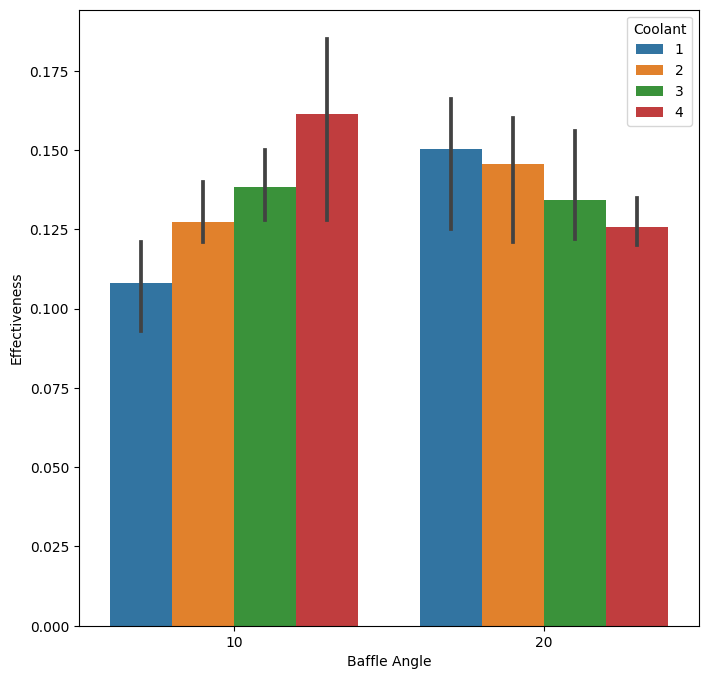

In [ ]:
plt.figure(figsize=[8,8])
sns.barplot(x=df['Baffle Angle'],y=df['Effectiveness'],hue=df['Coolant'])
plt.show()

<font color=blue>inferences:
 1. for baffle angle 10 and coolant 4 we have good effectiveness
 2. for the same baffle angle with coolant 1 we got less effectiveness
 3. but for baffle angle 20 we got good effectiveness for coolant 1

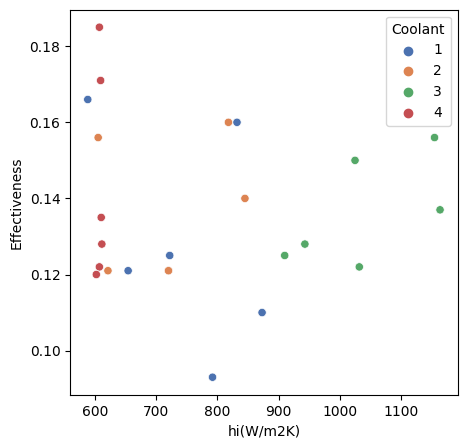

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df,x='hi(W/m2K)',y='Effectiveness',hue='Coolant',palette='deep')
plt.show()

<font color = blue>Inferences:
1. coefficient with least value for the coolant 4 got good effectiveness
2. coolant 1 has least effectiveness.

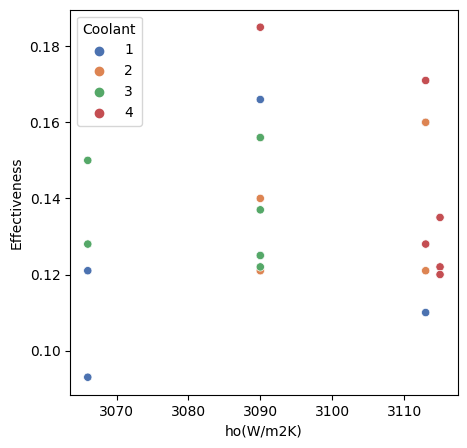

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df,x='ho(W/m2K)',y='Effectiveness',hue='Coolant',palette='deep')
plt.show()

<font color = blue>Inferences:
1. coefficient with moderate value for the coolant 4 got good effectiveness.
2. coefficient with least value for the coolant 1 got least effectiveness

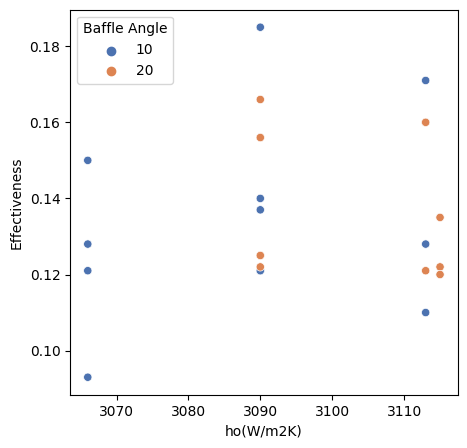

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df,x='ho(W/m2K)',y='Effectiveness',hue='Baffle Angle',palette='deep')
plt.show()

<font color = blue>Inferences:
1. baffle angle 10 with moderate value of co-efficient got good effectivness
2. baffle angle 10 with least value of co-efficient got good effectivness

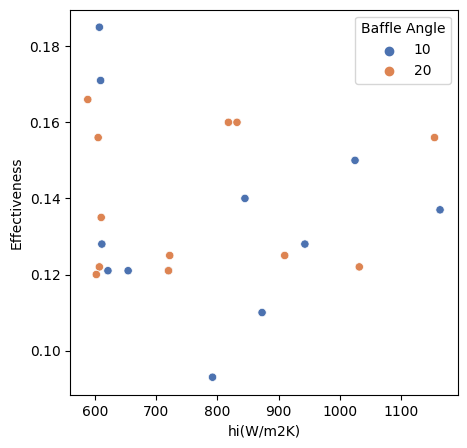

In [ ]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df,x='hi(W/m2K)',y='Effectiveness',hue='Baffle Angle',palette='deep')
plt.show()

<font color = blue>Inferences:
1. baffle angle 10 with least value of co-efficient got good effectivness
2. baffle angle 10 with moderate value of co-efficient got good effectivness

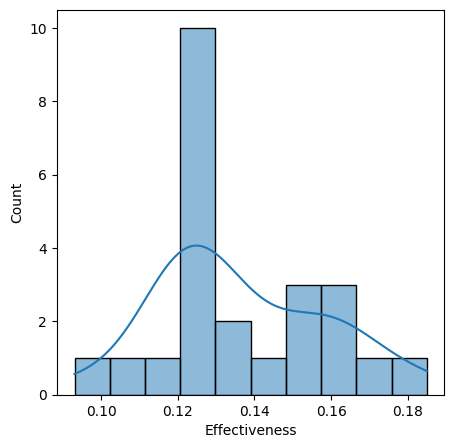

In [ ]:
plt.figure(figsize=[5,5])
sns.histplot(data=df['Effectiveness'],bins=10,kde=True)
plt.show()

<font color = blue>Inferences:
1. effectiveness is possitivly skewed distibuted

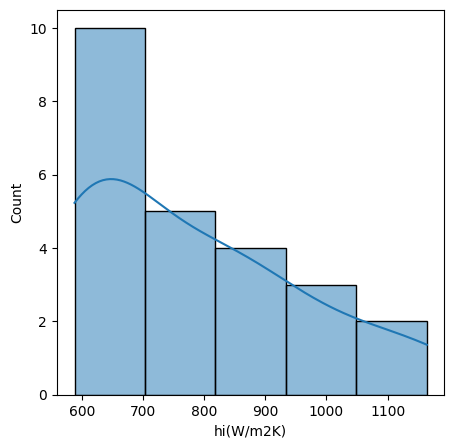

In [ ]:
plt.figure(figsize=[5,5])
sns.histplot(data=df['hi(W/m2K)'],bins=5,kde=True)
plt.show()

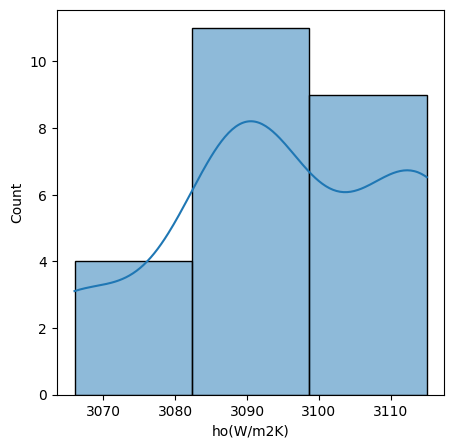

In [ ]:
plt.figure(figsize=[5,5])
sns.histplot(data=df['ho(W/m2K)'],bins=3,kde=True)
plt.show()

<font color = blue>Inferences:
1. both the co-efficients are positevly skewed

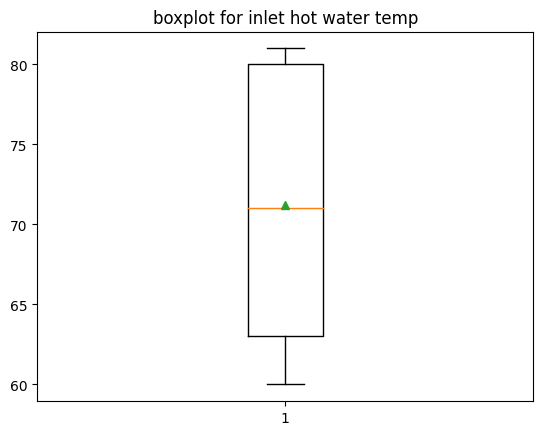

In [ ]:
plt.boxplot(df['Thi(0C)'],showmeans=True)
plt.title('boxplot for inlet hot water temp')
plt.show()

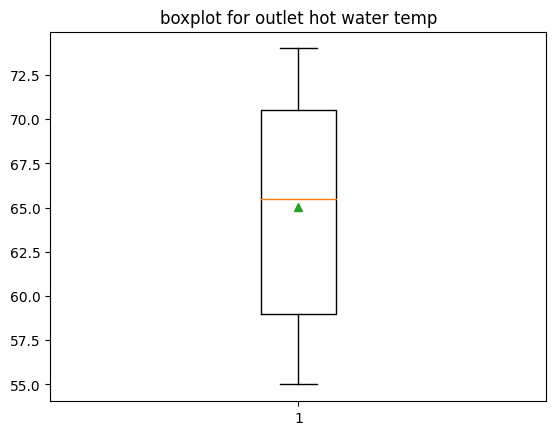

In [ ]:
plt.boxplot(df['Tho(0C)'],showmeans=True)
plt.title('boxplot for outlet hot water temp')
plt.show()

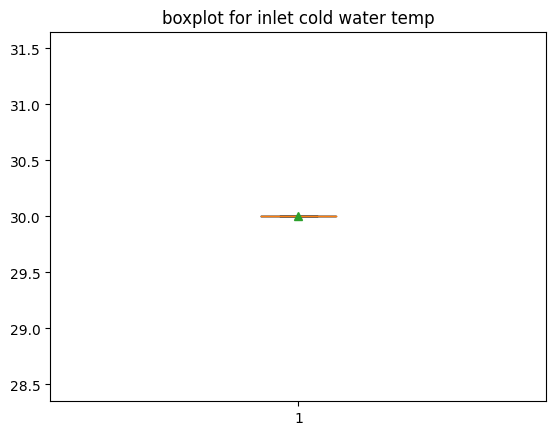

In [ ]:
plt.boxplot(df['Tci(0C)'],showmeans=True)
plt.title('boxplot for inlet cold water temp')
plt.show()

<font color = blue>Inferences:
1. No outliers are present in the dataset

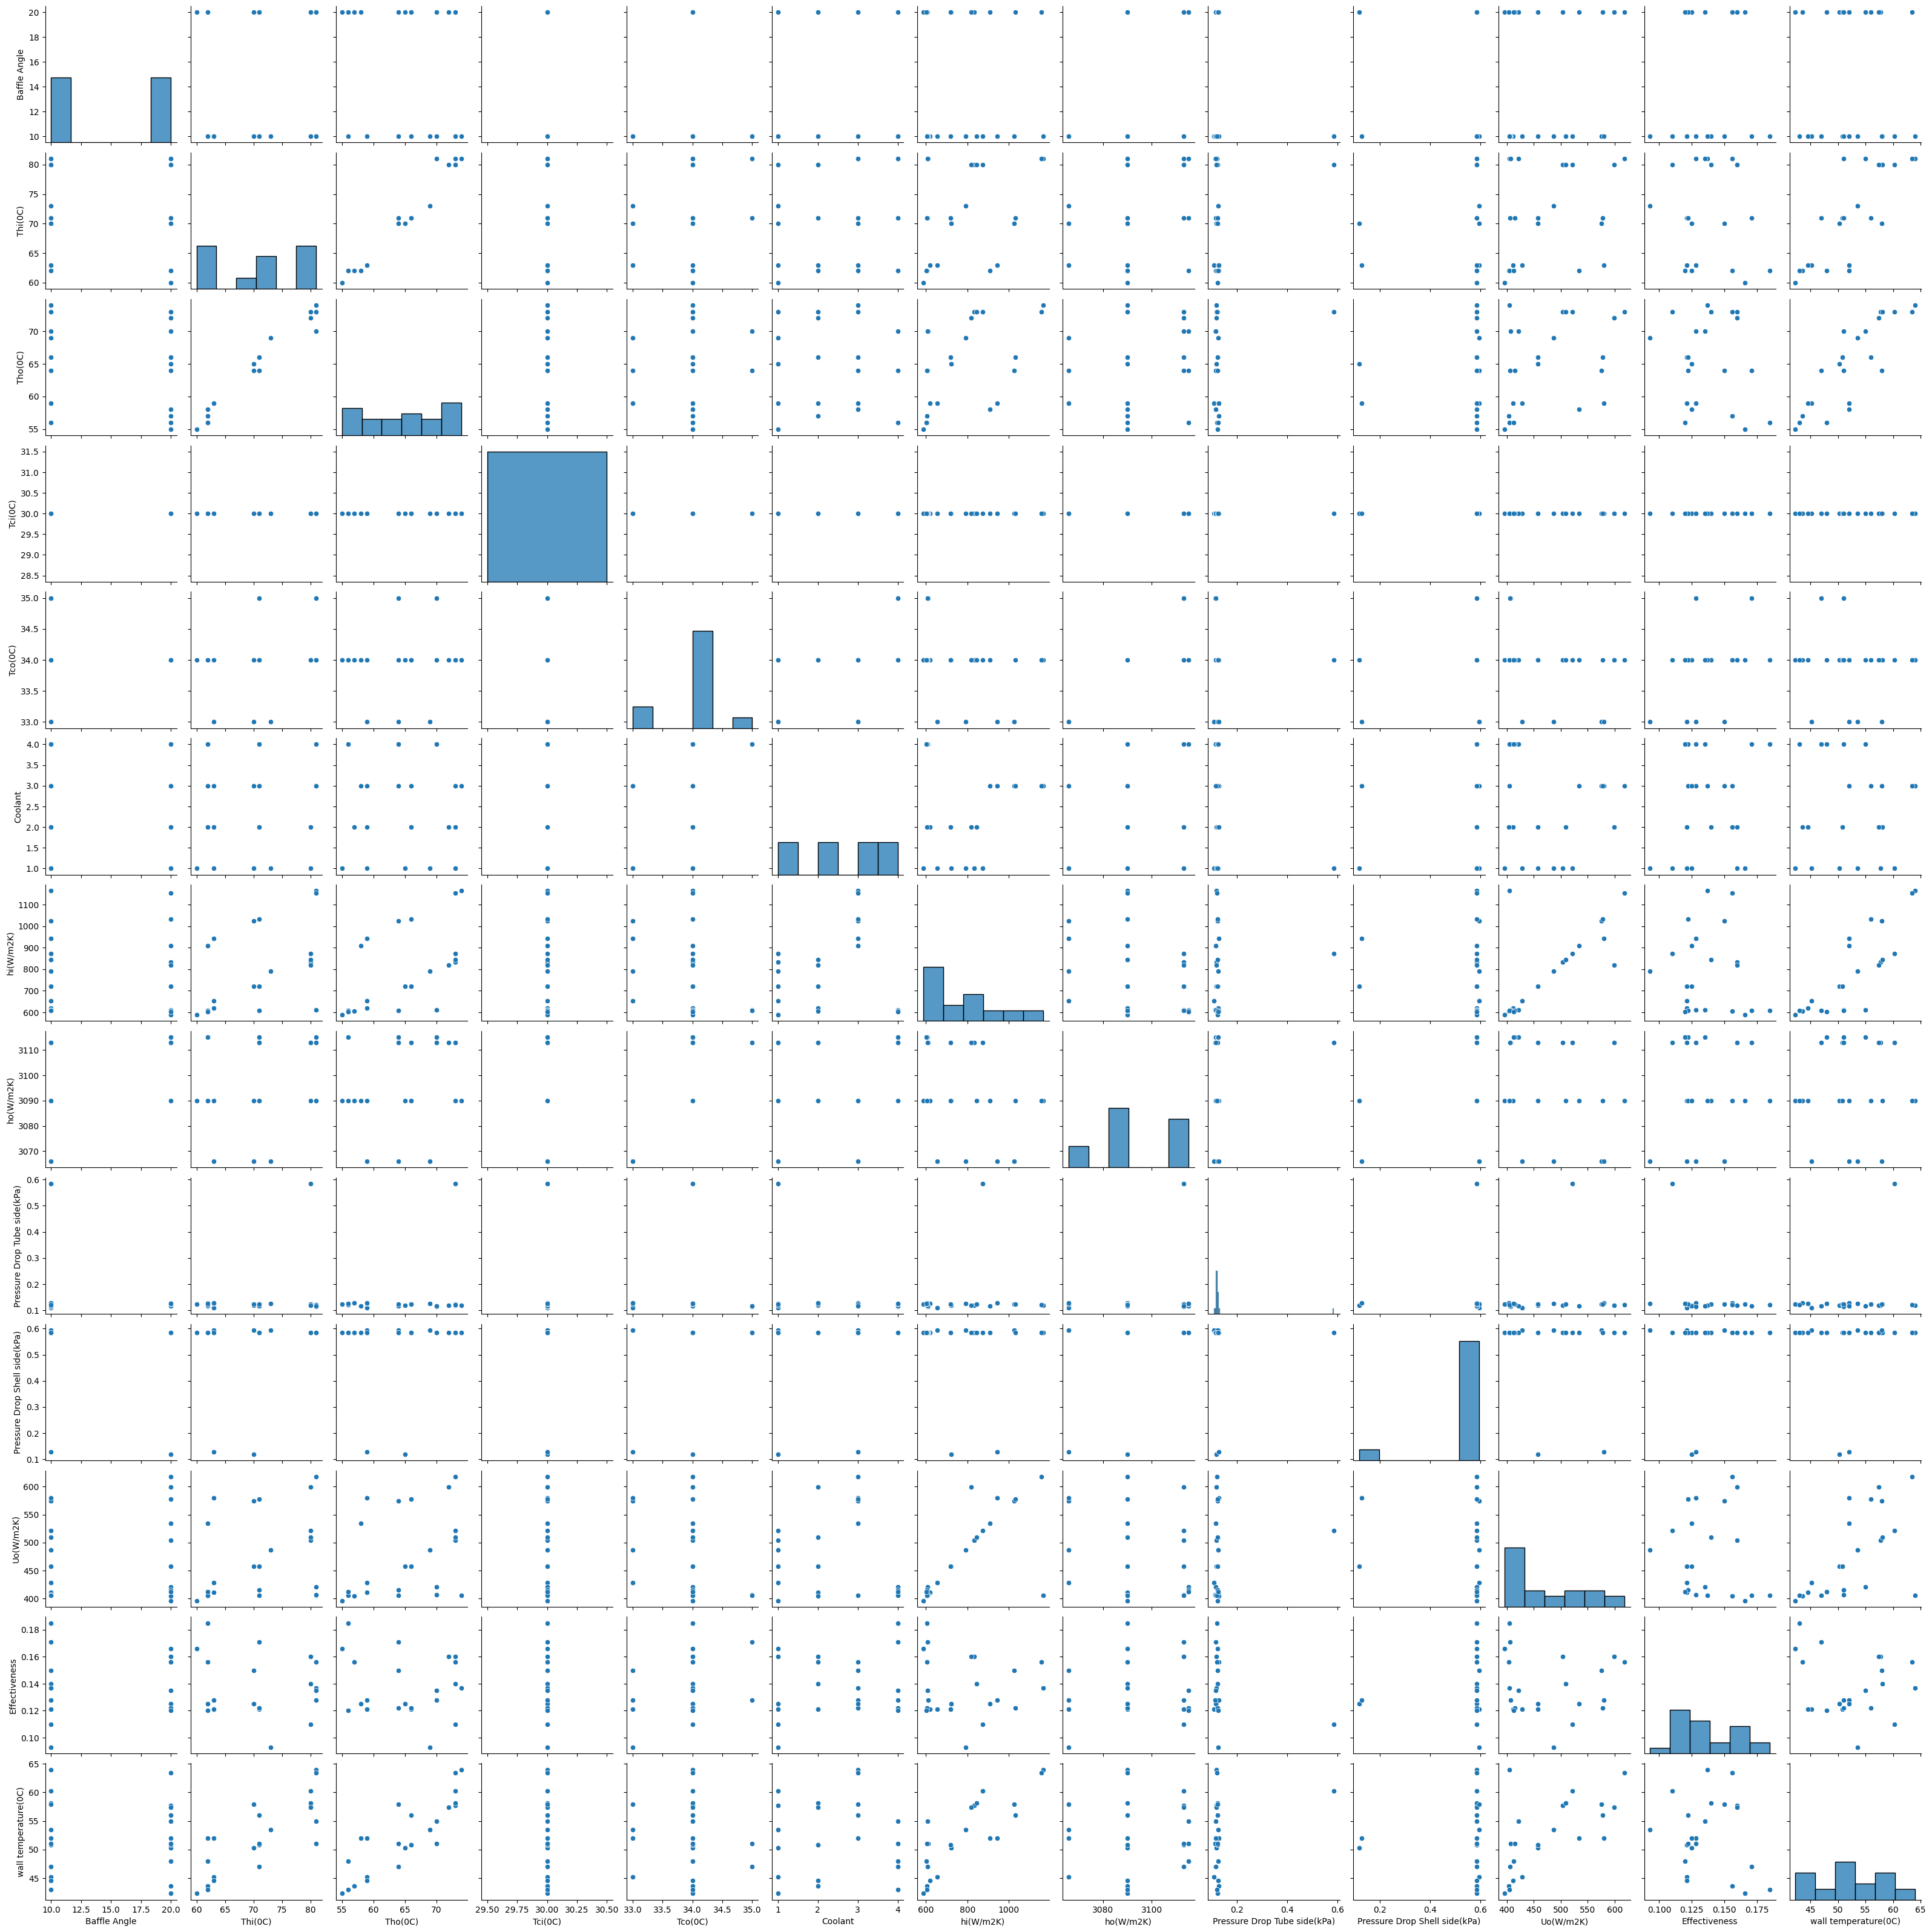

In [ ]:
sns.pairplot(df)
plt.show()

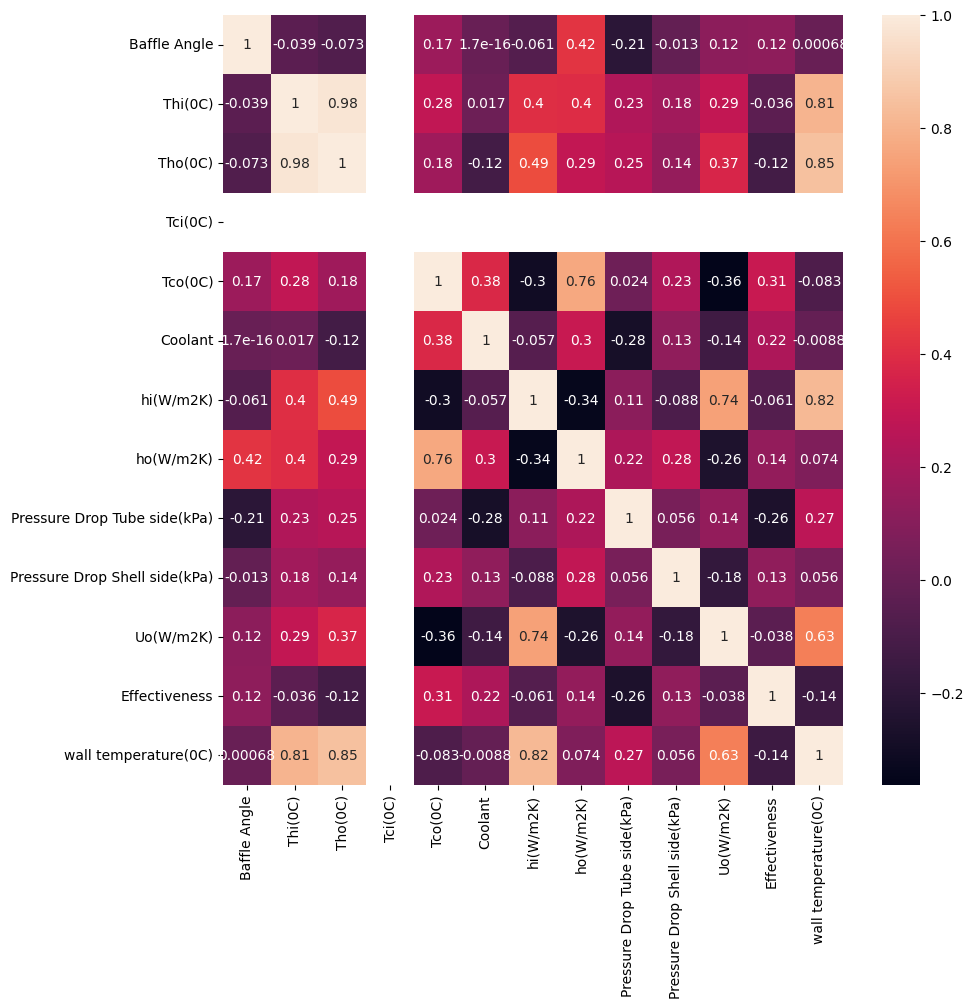

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.xlabel=(df.columns)
plt.ylabel=(df.columns)
plt.show()

<font color = red>Taking the dummy values for the catogarical column like bafle angle and coolant to increase the number of feauture

In [ ]:
dummies=pd.get_dummies(df,columns=['Baffle Angle','Coolant'])


In [ ]:
df=dummies

In [ ]:
df.head()

,Thi(0C),Tho(0C),Tci(0C),Tco(0C),hi(W/m2K),ho(W/m2K),Pressure Drop Tube side(kPa),Pressure Drop Shell side(kPa),Uo(W/m2K),Effectiveness,wall temperature(0C),Baffle Angle_10,Baffle Angle_20,Coolant_1,Coolant_2,Coolant_3,Coolant_4
0,80,73,30,34,873,3113,0.584,0.584,521,0.110,60.3,1,0,1,0,0,0
1,73,69,30,33,792,3066,0.126,0.594,487,0.093,53.5,1,0,1,0,0,0
2,63,59,30,33,654,3066,0.110,0.594,428,0.121,45.2,1,0,1,0,0,0
3,80,73,30,34,832,3113,0.120,0.584,504,0.160,57.7,0,1,1,0,0,0
4,70,65,30,34,722,3090,0.119,0.119,457,0.125,50.3,0,1,1,0,0,0


In [ ]:
df.shape

(24, 17)

<font color = blue>the new shape of the dataset after the transformation is 24 and 17

<font color = red>Deviding the data set into dependent and independent feauture

In [ ]:
x=df.drop('Effectiveness',axis=1)
y=df.iloc[:,9:10]

In [ ]:
x.shape,y.shape

((24, 16), (24, 1))

<font color = red>split the dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19, 16), (5, 16), (19, 1), (5, 1))

<font color=red>scale down the independent feauture data in to standard normal distribution using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Thi(0C)                        24 non-null     int64  
 1   Tho(0C)                        24 non-null     int64  
 2   Tci(0C)                        24 non-null     int64  
 3   Tco(0C)                        24 non-null     int64  
 4   hi(W/m2K)                      24 non-null     int64  
 5   ho(W/m2K)                      24 non-null     int64  
 6   Pressure Drop Tube side(kPa)   24 non-null     float64
 7   Pressure Drop Shell side(kPa)  24 non-null     float64
 8   Uo(W/m2K)                      24 non-null     int64  
 9   Effectiveness                  24 non-null     float64
 10  wall temperature(0C)           24 non-null     float64
 11  Baffle Angle_10                24 non-null     uint8  
 12  Baffle Angle_20                24 non-null     uint8

# <font color = green> Model selection

<font color = red>Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6593857773820938

In [ ]:
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

-0.2622746472850992

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=['predicted'])
y_pred

,predicted
0,0.118799
1,0.120373
2,0.102753
3,0.121322
4,0.139284


In [ ]:
y_test

,Effectiveness
11,0.156
10,0.121
22,0.122
14,0.128
20,0.185


## **<font color=red>Model Evaluation**

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

0.021893886757317883
0.0007778641286429695
0.14796582969495992


In [ ]:
x_train_predict=lr.predict(x_train)

In [ ]:
metrics.r2_score(y_train,x_train_predict)

0.6593857773820938

In [ ]:
metrics.r2_score(y_test,y_pred)

-0.2622746472850992

In [ ]:
lr.coef_

array([[ 9.75093352e-02, -1.13482355e-01,  6.24500451e-17,
         5.68153979e-03,  4.08200297e-02,  1.73502724e-02,
        -1.86431155e-02,  1.15550278e-03,  8.90984456e-03,
        -5.61528172e-03,  6.32086572e-03, -6.32086572e-03,
         1.72121864e-02,  4.13624406e-03, -1.61832723e-02,
        -6.28122412e-03]])

In [ ]:
lr.intercept_

array([0.13478947])

In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df = pd.DataFrame()
    df['actual']=y
    df['prediction']= y_pred
    df['residuals'] = abs(df['actual']-df['prediction'])
    return df

In [ ]:
df= get_residuals(lr,x_test,y_test)
df.head()

,actual,prediction,residuals
11,0.156,0.118799,0.037201
10,0.121,0.120373,0.000627
22,0.122,0.102753,0.019247
14,0.128,0.121322,0.006678
20,0.185,0.139284,0.045716


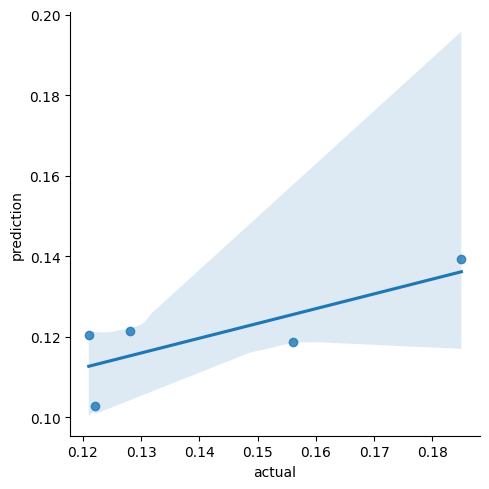

In [ ]:
sns.lmplot(x='actual', y='prediction', data=df)
diag_line=np.arange(df['residuals'].min(),df['residuals'].max())

<font color = blue>inferences:
From Linear Regression the model is not performing well and the error rate is too high that is evalated by using metrics method

<font color = green> Lasso and Ridge regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0,max_iter=100)

In [ ]:
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

In [ ]:
y_pred_lasso=pd.DataFrame(y_pred_lasso,columns=['lasso'])
y_pred_lasso

,lasso
0,0.134789
1,0.134789
2,0.134789
3,0.134789
4,0.134789


In [ ]:
metrics.r2_score(y_test,y_pred_lasso)

-0.09398953460230475

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0,max_iter=100)

In [ ]:
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [ ]:
y_pred_ridge=pd.DataFrame(y_pred_ridge,columns=['y_pred_ridge'])
y_pred_ridge

,y_pred_ridge
0,0.126414
1,0.138990
2,0.129897
3,0.104409
4,0.122509


In [ ]:
metrics.r2_score(y_test,y_pred_ridge)

-0.8573996392652132

<font color=blue>inferences:
both the models are showing poor performence so dis model is also rejected to predict the values

<font color = green>**Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=120,random_state=0)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.8486078277322424

In [ ]:
y_pred_rfr=rfr.predict(x_test)
rfr.score(x_test,y_test)

0.3565966587693098

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred_rfr))
print(metrics.mean_squared_error(y_test,y_pred_rfr))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred_rfr)))

0.017968333333333343
0.0003964908750000005
0.13404601200085492


<font color=blue>Inferences:
In random forest model we can observe that model performance is bit increased but it is showing a overfit problem

# <font color = green>XGBoost model

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb

array([0.13714786, 0.12879258, 0.14668293, 0.1102915 , 0.15125027],
      dtype=float32)

In [ ]:
def get_residuals1(model,x,y):
    y_pred = model.predict(x)
    df = pd.DataFrame()
    df['actual']=y
    df['prediction']= y_pred_xgb
    df['residuals'] = abs(df['actual']-df['prediction'])
    return df

In [ ]:
df= get_residuals1(xgb,x_test,y_test)
df.head()

,actual,prediction,residuals
11,0.156,0.137148,0.018852
10,0.121,0.128793,0.007793
22,0.122,0.146683,0.024683
14,0.128,0.110292,0.017708
20,0.185,0.151250,0.033750


In [ ]:
xgb.score(x_train,y_train)

0.9990426491740655

In [ ]:
xgb.score(x_test,y_pred_xgb)

1.0

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE : % f" %(rmse))

RMSE :  0.022262


<font color =blue> Inferences:
from this model we can see that its a generalised model with a good prediction
so that its conclude that xgboost is good model for the above problem statement

# <font color=orange>-------------------------------------------------END------------------------------------------------------------